#📌 Extracão

In [185]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [186]:
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None

Missing values per column:
 customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [187]:
df_customer = pd.json_normalize(df['customer'])
df = pd.concat([df.drop('customer', axis=1), df_customer], axis=1)
df.head()

,customerID,Churn,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3


In [188]:
df_phone = pd.json_normalize(df['phone'])
df = pd.concat([df.drop('phone', axis=1), df_phone], axis=1)

df_internet = pd.json_normalize(df['internet'])
df = pd.concat([df.drop('internet', axis=1), df_internet], axis=1)

df_account = pd.json_normalize(df['account'])
df = pd.concat([df.drop('account', axis=1), df_account], axis=1)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [189]:
print(df.describe())
print("contagens churn:\n", df['Churn'].value_counts())
print("\proporções churn:\n", df['Churn'].value_counts(normalize=True))

       SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000
contagens churn:
 Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
\proporções churn:
 Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3343844932.py:3: SyntaxWarning: invalid escape sequence '\p'
  print("\proporções churn:\n", df['Churn'].value_counts(normalize=True))


In [190]:
print(df[df['Churn'] == ''])

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
30    0047-ZHDTW        Female              0      No         No      11   
75    0120-YZLQA          Male              0      No         No      71   
96    0154-QYHJU          Male              0      No         No      29   
98    0162-RZGMZ        Female              1      No         No       5   
175   0274-VVQOQ          Male              1     Yes         No      65   
...          ...   ...     ...            ...     ...        ...     ...   
7158  9840-GSRFX        Female              0      No         No      14   
7180  9872-RZQQB        Female              0     Yes         No      49   
7211  9920-GNDMB          Male              0      No         No       9   
7239  9955-RVWSC        Female              0     Yes        Yes      67   
7247  9966-VYRTZ        Female              0     Yes        Yes      31   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
30    

#📊 Carga e análise

In [191]:
df = df[df['Churn'] != '']
print("contagens churn após limpeza:\n", df['Churn'].value_counts())
print("\proporções após limpeza:\n", df['Churn'].value_counts(normalize=True))
df.info()

contagens churn após limpeza:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64
\proporções após limpeza:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechS

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2722756833.py:3: SyntaxWarning: invalid escape sequence '\p'
  print("\proporções após limpeza:\n", df['Churn'].value_counts(normalize=True))


In [192]:
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'])
print(df['Charges.Total'].dtype)
df.info()


float64
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   objec

In [193]:
print(df.describe())

Colunas_Categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

for col in Colunas_Categoricas:
    print(f"\nValue counts for column '{col}':")
    print(df[col].value_counts())
    print(f"\nProportions for column '{col}':")
    print(df[col].value_counts(normalize=True))

       SeniorCitizen       tenure  Charges.Monthly  Charges.Total
count    7043.000000  7043.000000      7043.000000    7032.000000
mean        0.162147    32.371149        64.761692    2283.300441
std         0.368612    24.559481        30.090047    2266.771362
min         0.000000     0.000000        18.250000      18.800000
25%         0.000000     9.000000        35.500000     401.450000
50%         0.000000    29.000000        70.350000    1397.475000
75%         0.000000    55.000000        89.850000    3794.737500
max         1.000000    72.000000       118.750000    8684.800000

Value counts for column 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64

Proportions for column 'gender':
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

Value counts for column 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Proportions for column 'Partner':
Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: fl

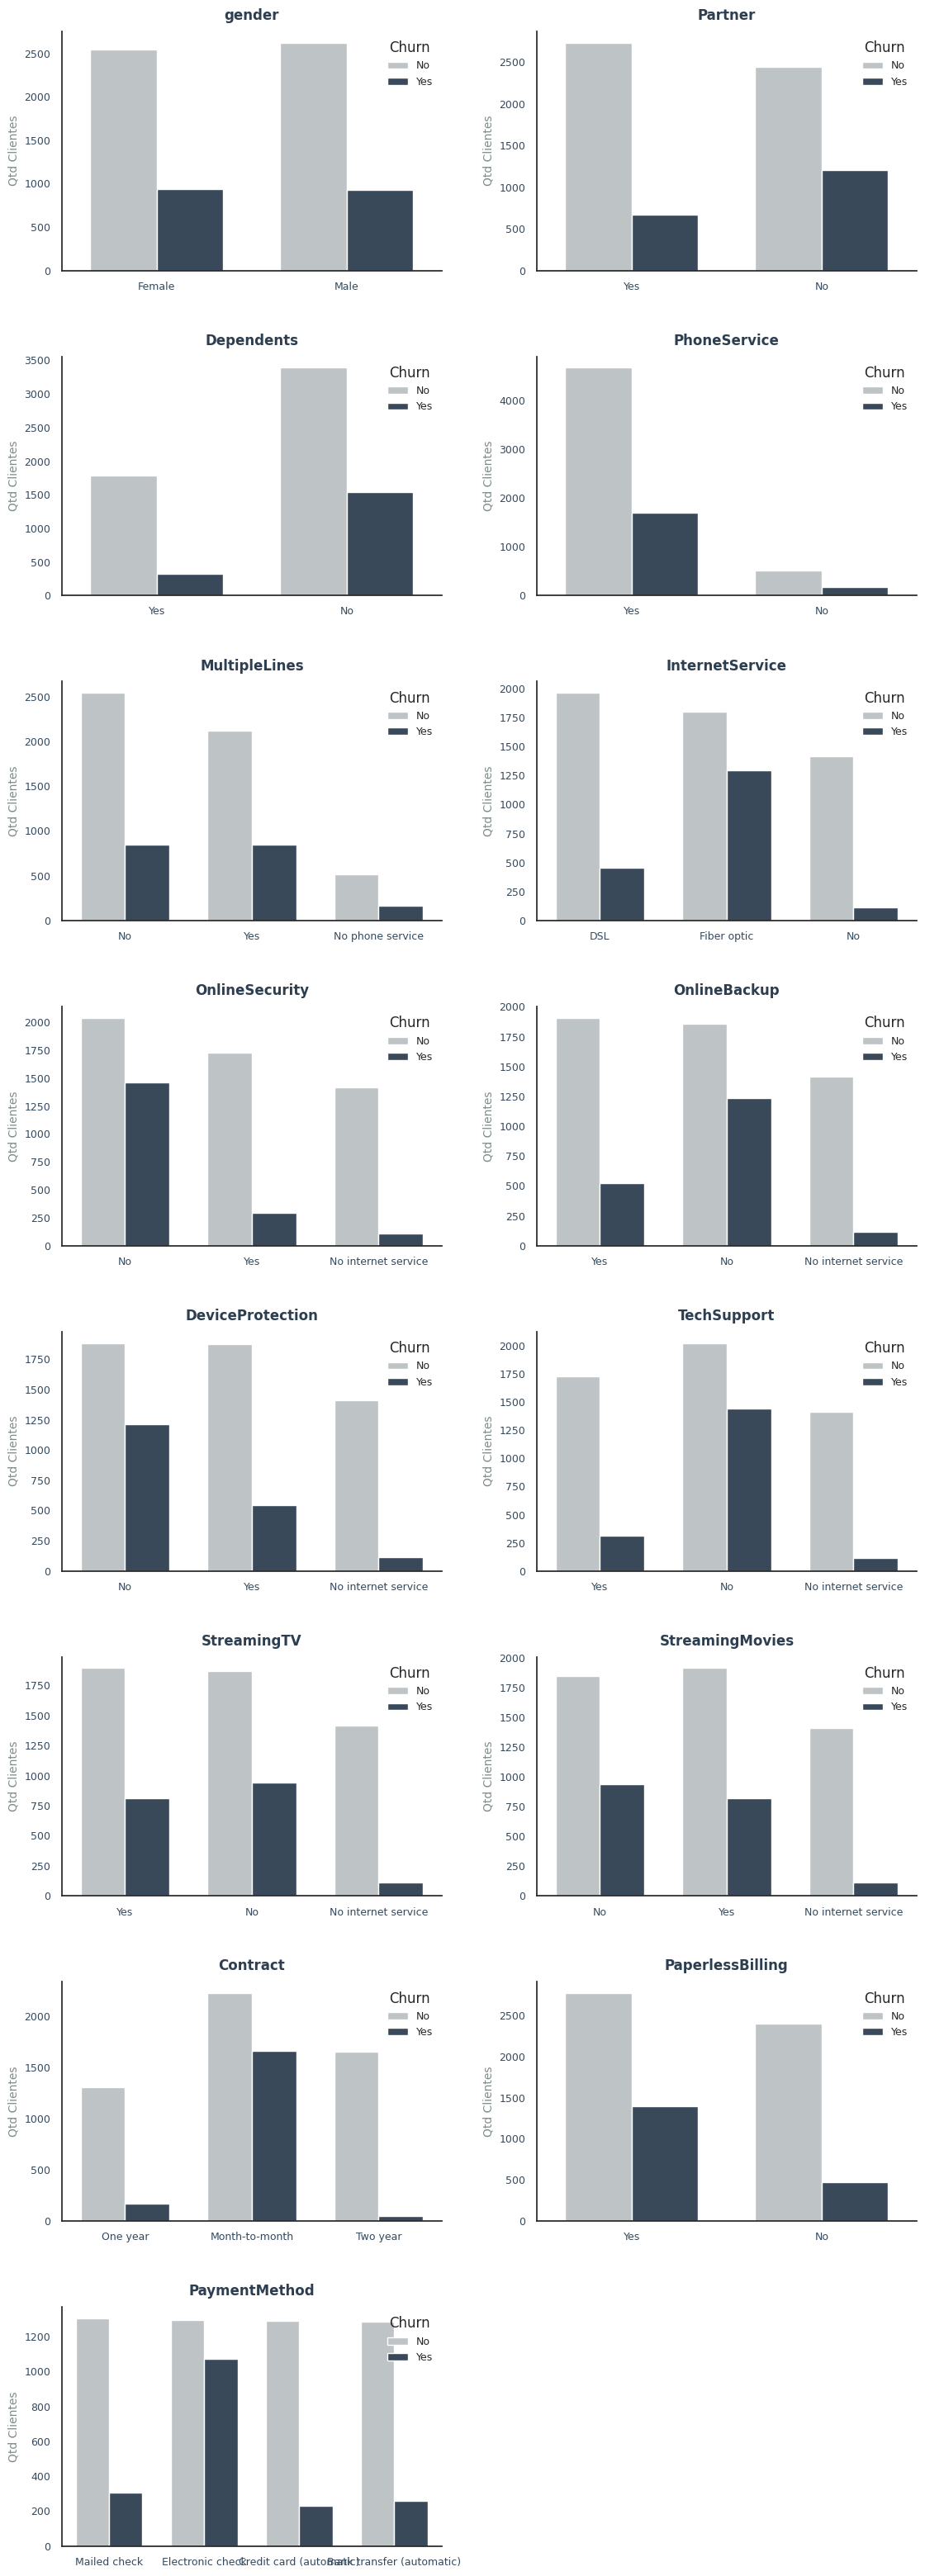

In [194]:
sns.set_theme(style="white")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.family'] = 'sans-serif'

n_cols = 2
n_rows = math.ceil(len(Colunas_Categoricas) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

custom_palette = ["#BDC3C7", "#34495E"]

for i, col in enumerate(Colunas_Categoricas):
    ax = axes[i]

    sns.countplot(data=df, x=col, hue='Churn', palette=custom_palette, ax=ax, width=0.7)

    ax.set_title(f'{col}', fontsize=12, pad=10, fontweight='600', color='#2C3E50')
    ax.set_xlabel('')
    ax.set_ylabel('Qtd Clientes', fontsize=10, color='#7F8C8D')

    ax.legend(title='Churn', frameon=False, fontsize=9)
    sns.despine(ax=ax)
    ax.tick_params(axis='both', which='major', labelsize=9, colors='#34495E')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])



plt.tight_layout(pad=3.0)
plt.show()

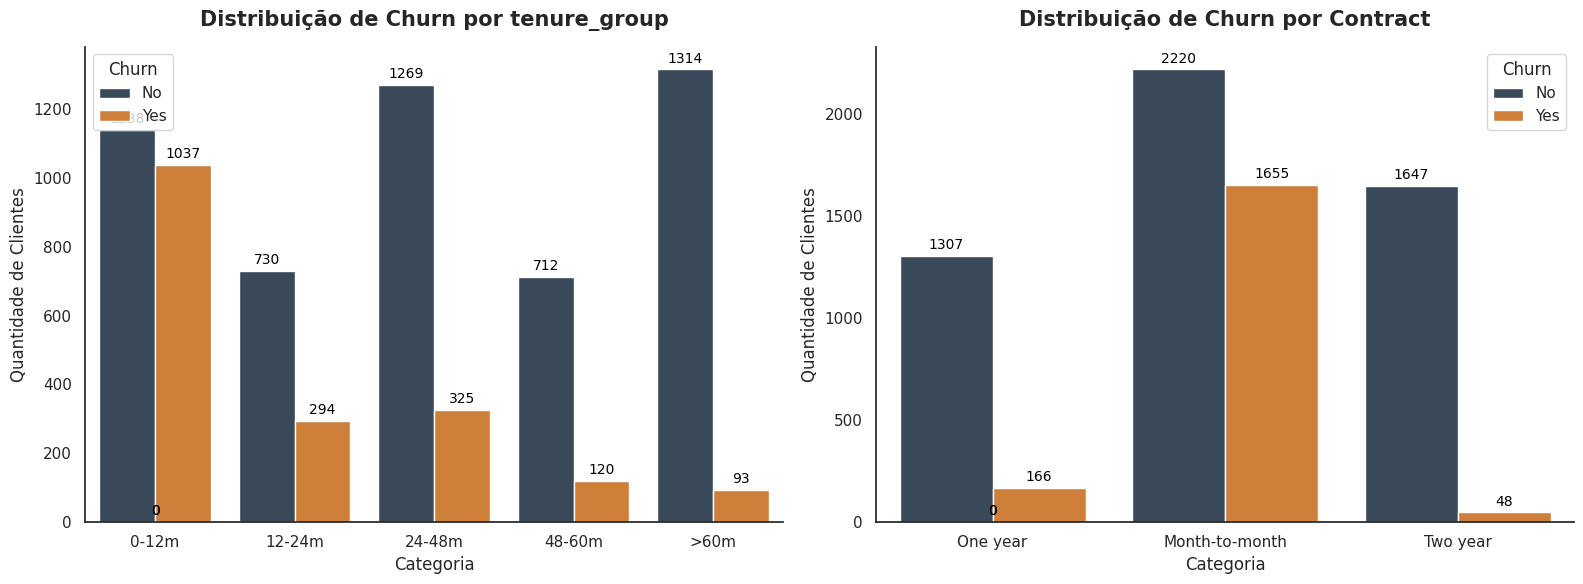

In [195]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 100],
                            labels=['0-12m', '12-24m', '24-48m', '48-60m', '>60m'])

cols_to_plot = ['tenure_group', 'Contract']

plt.figure(figsize=(16, 6))

for i, col in enumerate(cols_to_plot):
    ax = plt.subplot(1, 2, i + 1)

    sns.countplot(data=df, x=col, hue='Churn', palette=['#34495e', '#e67e22'], ax=ax)

    ax.set_title(f'Distribuição de Churn por {col}', fontsize=15, fontweight='bold', pad=15)
    ax.set_xlabel('Categoria', fontsize=12)
    ax.set_ylabel('Quantidade de Clientes', fontsize=12)
    sns.despine()

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

#📄Relatorio Final

**Introdução**
<br><br>
O objetivo deste projeto foi analisar os dados da TelecomX para entender os fatores que levam à evasão de clientes (Churn). O "Churn" ocorre quando um cliente cancela o serviço, o que representa uma perda direta de receita para a empresa. Identificar padrões e comportamentos que precedem o cancelamento é fundamental para implementar estratégias de retenção mais eficazes e personalizadas.<br><br>

**Limpeza e Tratamento de Dado**s
<br><br>
Os dados foram inicialmente extraídos de uma fonte JSON hospedada no GitHub. O processo de tratamento envolveu:

1. Importação: Utilização da biblioteca pandas para ler o arquivo JSON.

2. Normalização de Dados Aninhados: Como várias colunas (customer, phone, internet, account) continham dicionários (formato JSON aninhado), foi utilizada a função pd.json_normalize para transformar essas chaves em colunas individuais do DataFrame.

3. Verificação de Dados Ausentes: Foi realizada uma inspeção para identificar valores nulos, garantindo a integridade da análise.

4. Concatenização: Após a normalização, as novas colunas foram integradas ao conjunto de dados principal, resultando em um DataFrame final com 21 colunas, incluindo informações demográficas, tipos de serviço e detalhes financeiros.
<br><br>
**Análise Exploratória de Dados**
<br><br>
A análise focou em identificar a distribuição dos dados e correlações com a variável alvo Churn.

1. Perfil do Cliente: Foram analisadas variáveis como gênero, se o cliente é idoso (SeniorCitizen), se possui parceiros ou dependentes.

2. Padrões de Serviço: Clientes com serviços de fibra ótica e contratos de "Mês a mês" (Month-to-month) apresentaram frequências de churn que merecem atenção, comparadas a contratos anuais.

3. Tempo de Casa (Tenure): Observou-se que o tempo de contrato (tenure) tem um impacto significativo, onde clientes mais novos tendem a cancelar com mais facilidade.

4. Faturamento: A análise das cobranças mensais (Charges.Monthly) indicou que valores mais altos podem estar correlacionados com uma maior taxa de evasão.
<br><br>
**Conclusões e Insights**
<br><br>
Vulnerabilidade em Novos Clientes: Existe uma concentração de evasão nos primeiros meses de contrato, sugerindo que a experiência inicial do cliente é crítica.

Tipo de Contrato: O modelo "mês a mês" é o que possui maior rotatividade, enquanto contratos de longo prazo (um ou dois anos) retêm melhor o cliente.

Método de Pagamento: Clientes que utilizam "Electronic check" (cheque eletrônico) tendem a ter taxas de churn superiores aos que utilizam métodos automáticos ou cartão de crédito.
<br><br>
***Recomendações***
<br><br>
Programas de Fidelidade: Oferecer descontos ou benefícios para migrar clientes do contrato "mês a mês" para contratos anuais.

Onboarding Especializado: Fortalecer o suporte e acompanhamento de novos clientes (com baixo tenure) para garantir que eles percebam valor nos serviços desde o início.

Incentivo ao Pagamento Automático: Promover campanhas que incentivem a mudança do método de pagamento para débito automático ou cartão de crédito, reduzindo o atrito mensal.

Revisão de Preços para Fibra Ótica: Avaliar se o custo-benefício dos planos de fibra ótica está competitivo, dado que esse grupo apresenta sinais de insatisfação.